#Homerwork 7
##Rafael Barrera Quiroz C.C. 1035433047

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

#Explore dataset

In [2]:
df = pd.read_csv('kc_house_data.txt')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,263000018,20140521T000000,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21611,6600060120,20150223T000000,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21612,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21613,291310100,20150116T000000,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


###Description dataset

In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21615 entries, 0 to 21614
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21615 non-null  int64  
 1   date           21615 non-null  object 
 2   price          21615 non-null  float64
 3   bedrooms       21615 non-null  int64  
 4   bathrooms      21615 non-null  float64
 5   sqft_living    21615 non-null  int64  
 6   sqft_lot       21614 non-null  float64
 7   floors         21615 non-null  float64
 8   waterfront     21615 non-null  int64  
 9   view           21615 non-null  int64  
 10  condition      21615 non-null  int64  
 11  grade          21615 non-null  int64  
 12  sqft_above     21615 non-null  int64  
 13  sqft_basement  21615 non-null  int64  
 14  yr_built       21615 non-null  int64  
 15  yr_renovated   21615 non-null  int64  
 16  zipcode        21615 non-null  int64  
 17  lat            21615 non-null  float64
 18  long  

In [6]:
print('Número de filas', df.shape[0])
print('Número de columnas', df.shape[1])
print('Nombres de las columnas', df.columns)

Número de filas 21615
Número de columnas 21
Nombres de las columnas Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [7]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21610,263000018,20140521T000000,360000.0,3,2.50,1530,1131.0,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21611,6600060120,20150223T000000,400000.0,4,2.50,2310,5813.0,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21612,1523300141,20140623T000000,402101.0,2,0.75,1020,1350.0,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21613,291310100,20150116T000000,400000.0,3,2.50,1600,2388.0,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21614,1523300157,20141015T000000,325000.0,2,0.75,1020,1076.0,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161500e+04,2.161500e+04,21615.000000,21615.000000,21615.000000,2.161400e+04,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000,21615.000000
mean,4.579945e+09,5.400672e+05,3.370807,2.114724,2079.874763,1.511002e+04,1.494263,0.007541,0.234282,3.409577,7.656812,1788.337173,291.537590,1971.005968,84.394448,98077.936109,47.560039,-122.213873,1986.521351,12779.768864
std,2.876672e+09,3.671167e+05,0.930026,0.770136,918.402073,4.142026e+04,0.539985,0.086513,0.766285,0.650893,1.175421,828.071354,442.564514,29.372179,401.661476,53.503930,0.138565,0.140843,685.367239,27328.234764
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1428.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470850,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069350e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10085.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


###Duplicate rows

In [10]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape[0])

number of duplicate rows:  2


In [11]:
duplicate_rows_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
99,722079104,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036
100,722079104,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036


In [12]:
df.iloc[97:103,:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
97,1099611230,20140912T000000,199000.0,4,1.50,1160,6400.0,1.0,0,0,...,7,1160,0,1975,0,98023,47.3036,-122.378,1160,6400
98,722079104,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036
99,722079104,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036
100,722079104,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036
101,7338200240,20140516T000000,437500.0,3,2.50,2320,36847.0,2.0,0,2,...,9,2320,0,1992,0,98045,47.4838,-121.714,2550,35065
102,1952200240,20140611T000000,850830.0,3,2.50,2070,13241.0,1.5,0,0,...,9,1270,800,1910,0,98102,47.6415,-122.315,2200,4500


### Delet duplicate rows

In [13]:
df=df.drop_duplicates()
print('Número de filas', df.shape[0])
print('Número de columnas', df.shape[1])

Número de filas 21613
Número de columnas 21


In [14]:
df.iloc[97:101,:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
97,1099611230,20140912T000000,199000.0,4,1.50,1160,6400.0,1.0,0,0,...,7,1160,0,1975,0,98023,47.3036,-122.378,1160,6400
98,722079104,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036
101,7338200240,20140516T000000,437500.0,3,2.50,2320,36847.0,2.0,0,2,...,9,2320,0,1992,0,98045,47.4838,-121.714,2550,35065
102,1952200240,20140611T000000,850830.0,3,2.50,2070,13241.0,1.5,0,0,...,9,1270,800,1910,0,98102,47.6415,-122.315,2200,4500


In [15]:
df[df['id']==722079104]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
98,722079104,20140711T000000,314000.0,3,1.75,1810,41800.0,1.0,0,0,...,7,1210,600,1980,0,98038,47.4109,-121.958,1650,135036


### Missing values and NaN

In [16]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         1
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         1
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
df[df['sqft_lot'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
109,3530510041,20140723T000000,188500.0,2,1.75,1240,NaN,1.0,0,0,...,8,1240,0,1985,0,98198,47.3813,-122.322,1270,4966


In [19]:
df[df['sqft_lot'].isna()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
109,3530510041,20140723T000000,188500.0,2,1.75,1240,NaN,1.0,0,0,...,8,1240,0,1985,0,98198,47.3813,-122.322,1270,4966


In [20]:
df=df.dropna()

In [21]:
print('Número de filas', df.shape[0])
print('Número de columnas', df.shape[1])

Número de filas 21612
Número de columnas 21


### Histograms

In [22]:
df=df.drop(['id','zipcode'],axis=1)

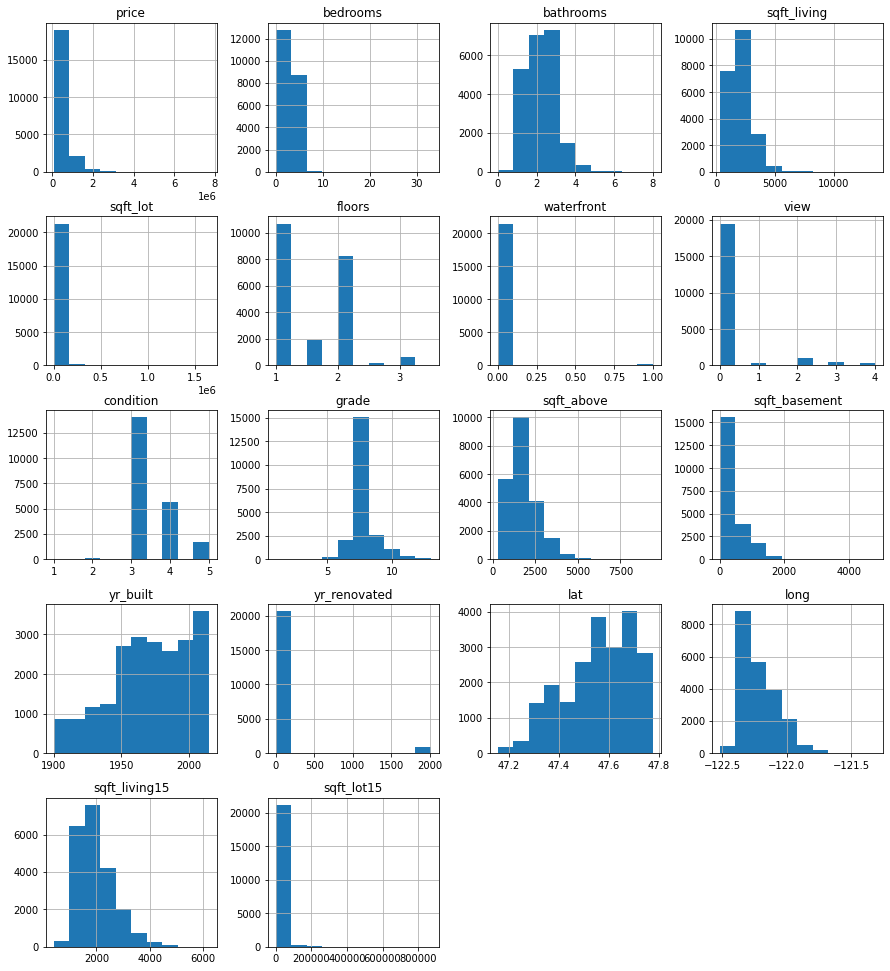

In [23]:
df.hist(figsize=(15,17));

### Box plots

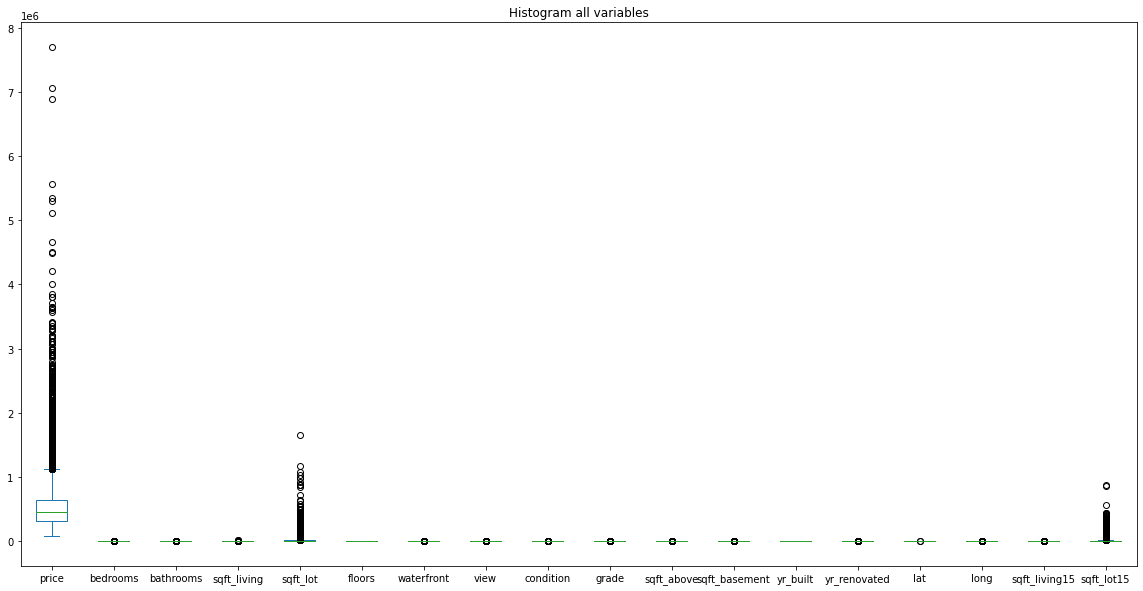

In [24]:
df.plot(kind='box', figsize=(20,10),title='Histogram all variables');

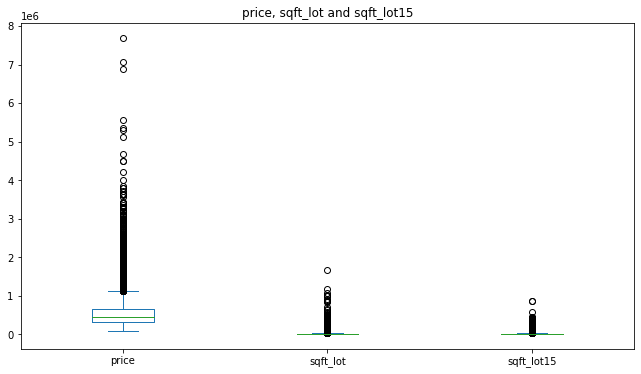

In [25]:
df[['price','sqft_lot','sqft_lot15']].plot(kind='box',figsize=(11,6),title='price, sqft_lot and sqft_lot15');

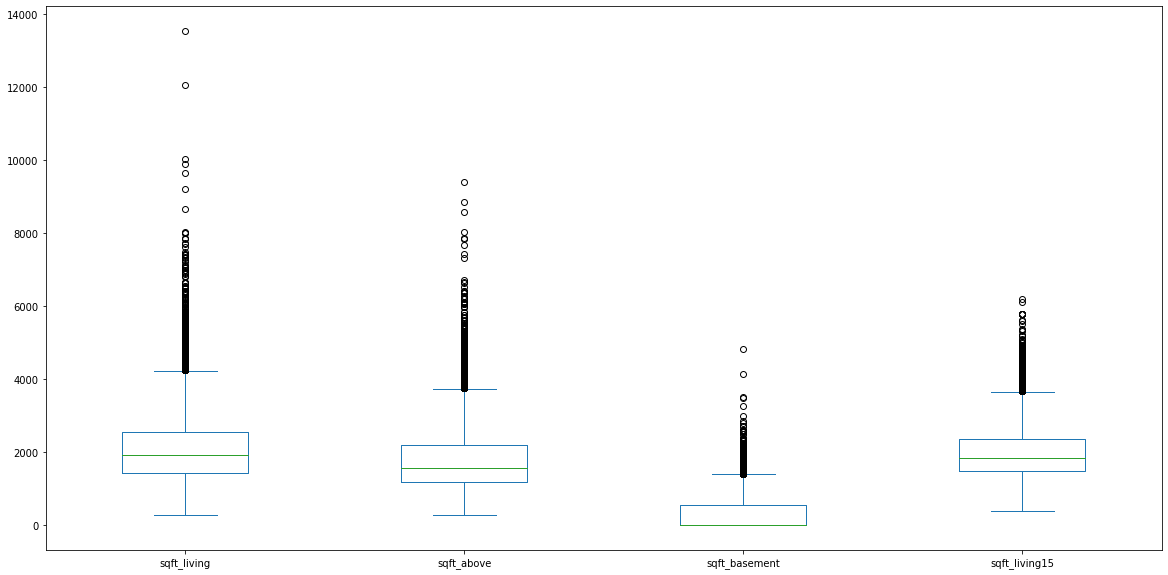

In [26]:
df[['sqft_living', 'sqft_above','sqft_basement','sqft_living15']].plot(kind='box',figsize=(20,10));

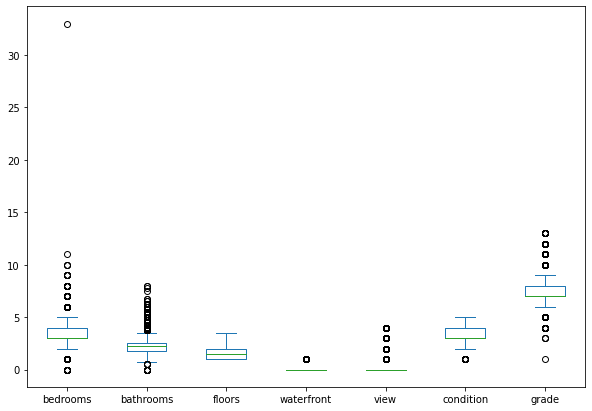

In [27]:
df[['bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition', 'grade']].plot(kind='box', figsize=(10,7));

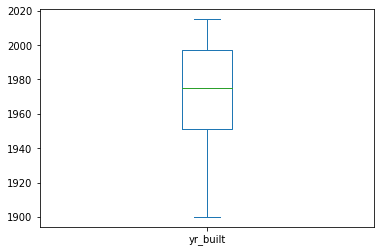

In [28]:
df['yr_built'].plot(kind='box');

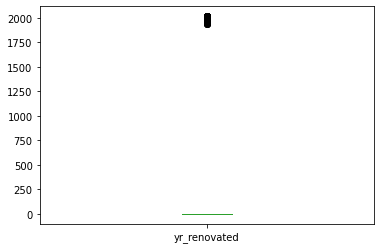

In [29]:
df['yr_renovated'].plot(kind='box');

### Convert to temporal series dataset

In [30]:
df['date']=pd.to_datetime(df['date'])
df['year']=pd.DatetimeIndex(df['date']).year
df['month']=pd.DatetimeIndex(df['date']).month
df['day']=pd.DatetimeIndex(df['date']).day

In [31]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
0,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,3,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13
1,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,3,...,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9
2,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,3,...,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25
3,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,5,...,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9
4,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,3,...,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,2014-05-21,360000.0,3,2.50,1530,1131.0,3.0,0,0,3,...,0,2009,0,47.6993,-122.346,1530,1509,2014,5,21
21611,2015-02-23,400000.0,4,2.50,2310,5813.0,2.0,0,0,3,...,0,2014,0,47.5107,-122.362,1830,7200,2015,2,23
21612,2014-06-23,402101.0,2,0.75,1020,1350.0,2.0,0,0,3,...,0,2009,0,47.5944,-122.299,1020,2007,2014,6,23
21613,2015-01-16,400000.0,3,2.50,1600,2388.0,2.0,0,0,3,...,0,2004,0,47.5345,-122.069,1410,1287,2015,1,16


### Plots average price in day, month and year

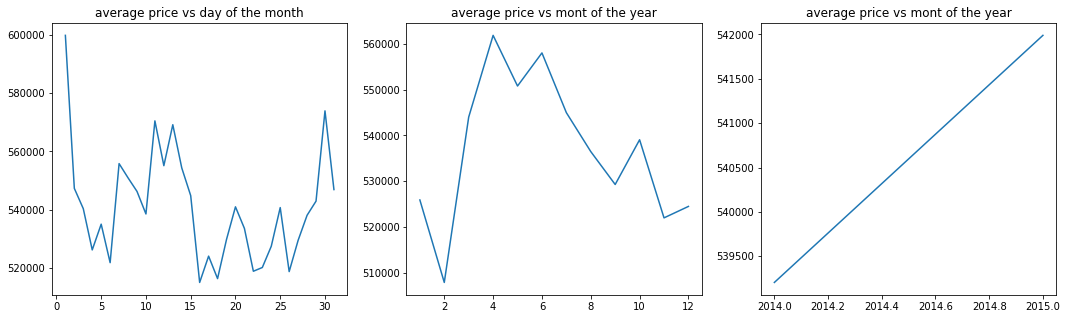

In [32]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
ax[0].plot(df.groupby('day').mean()['price'])
ax[0].set_title('average price vs day of the month')
ax[1].plot(df.groupby('month').mean()['price'])
ax[1].set_title('average price vs mont of the year')
ax[2].plot(df.groupby('year').mean()['price'])
ax[2].set_title('average price vs mont of the year')
plt.show()

###Clean dataset with 3$σ$ rule

In [33]:
df_2=df.drop(['date'],axis=1)

In [34]:
std_dev=3
outliers=(np.abs(stats.zscore(df_2))>std_dev).any(axis=1)
df_outliers=df_2[outliers]

In [35]:
df_outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
1,538000.0,3,2.25,2570,7242.0,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9
5,1225000.0,4,4.50,5420,101930.0,1.0,0,0,3,11,...,1530,2001,0,47.6561,-122.005,4760,101930,2014,5,12
10,662500.0,3,2.50,3560,9796.0,1.0,0,0,3,8,...,1700,1965,0,47.6007,-122.145,2210,8925,2015,4,3
15,650000.0,4,3.00,2950,5000.0,2.0,0,3,3,9,...,970,1979,0,47.5714,-122.375,2140,4000,2015,1,24
21,2000000.0,3,2.75,3050,44867.0,1.0,0,4,3,9,...,720,1968,0,47.5316,-122.233,4110,20336,2014,8,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21563,750000.0,5,4.00,4500,8130.0,2.0,0,0,3,10,...,0,2007,0,47.4832,-122.145,2840,8402,2015,1,15
21570,1700000.0,4,3.50,3830,8963.0,2.0,0,0,3,10,...,710,2014,0,47.5990,-122.197,2190,10777,2015,1,30
21578,3567000.0,5,4.50,4850,10584.0,2.0,1,4,3,10,...,1310,2007,0,47.5943,-122.110,3470,18270,2015,1,7
21592,1222500.0,4,3.50,4910,9444.0,1.5,0,0,3,11,...,1800,2007,0,47.6502,-122.066,4560,11063,2014,5,14


In [36]:
df_clean=df_2[~outliers]

In [37]:
df_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650.0,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13
2,180000.0,2,1.00,770,10000.0,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000.0,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080.0,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18
6,257500.0,3,2.25,1715,6819.0,2.0,0,0,3,7,...,0,1995,0,47.3097,-122.327,2238,6819,2014,6,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,360000.0,3,2.50,1530,1131.0,3.0,0,0,3,8,...,0,2009,0,47.6993,-122.346,1530,1509,2014,5,21
21611,400000.0,4,2.50,2310,5813.0,2.0,0,0,3,8,...,0,2014,0,47.5107,-122.362,1830,7200,2015,2,23
21612,402101.0,2,0.75,1020,1350.0,2.0,0,0,3,7,...,0,2009,0,47.5944,-122.299,1020,2007,2014,6,23
21613,400000.0,3,2.50,1600,2388.0,2.0,0,0,3,8,...,0,2004,0,47.5345,-122.069,1410,1287,2015,1,16


### dataset _clean_ box plot

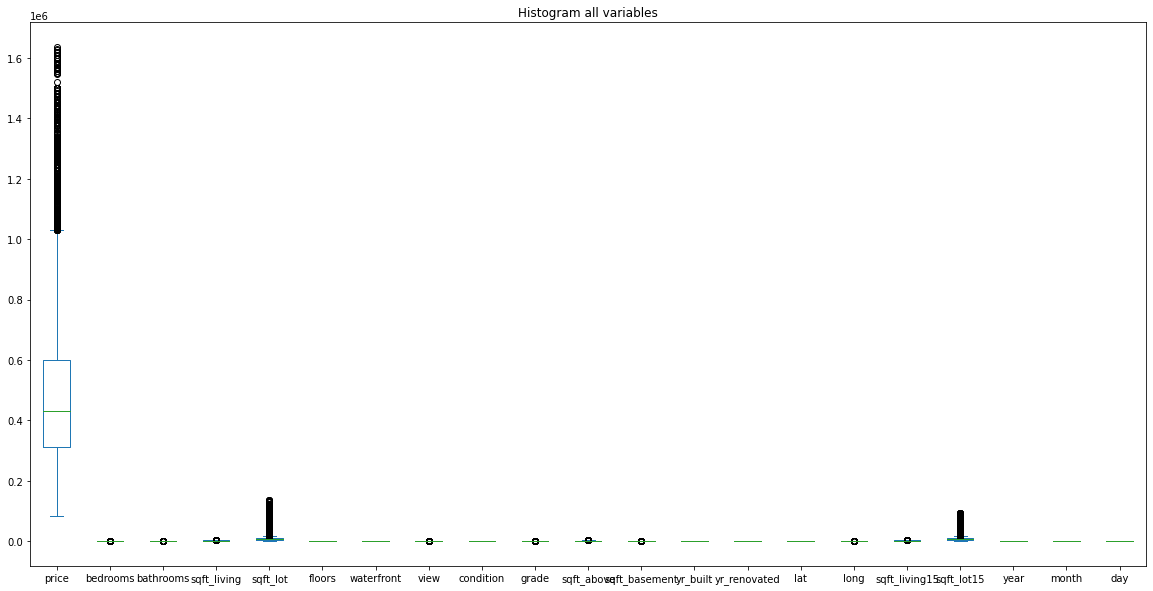

In [38]:
df_clean.plot(kind='box', figsize=(20,10),title='Histogram all variables');

**Observe that not all outliers values was eliminated with 3$\sigma$ rule**

### Plots average price in day, month and year _clean_ datset

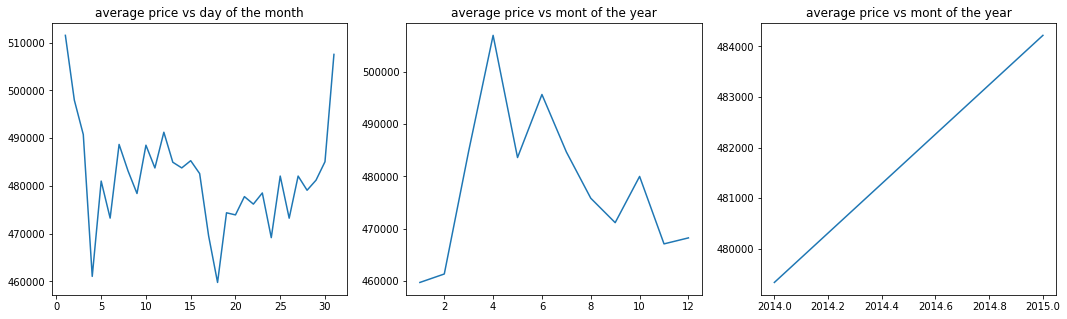

In [39]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
ax[0].plot(df_clean.groupby('day').mean()['price'])
ax[0].set_title('average price vs day of the month')
ax[1].plot(df_clean.groupby('month').mean()['price'])
ax[1].set_title('average price vs mont of the year')
ax[2].plot(df_clean.groupby('year').mean()['price'])
ax[2].set_title('average price vs mont of the year')
plt.show()

####Spearman coefficent correlation table _clean_ datset

In [40]:
df_clean_price=df_clean['price']
df_clean_remain=df_clean.drop(['price'],axis=1)

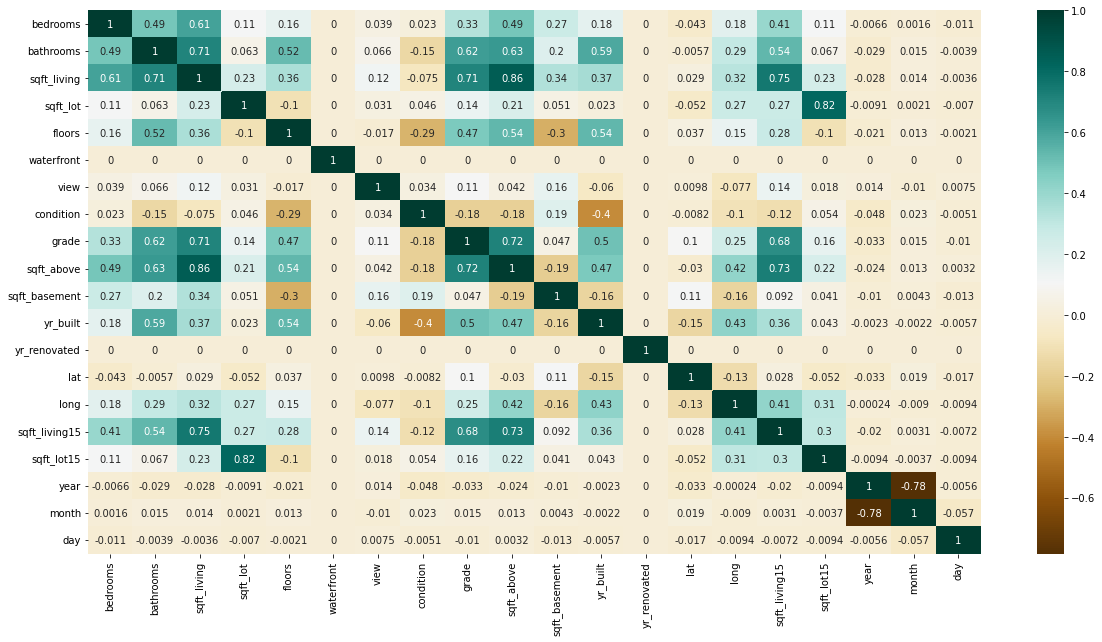

In [41]:
plt.figure(figsize=(20,10))
correlation_values=df_clean_remain.corr().fillna(0)
correlation_values['waterfront']['waterfront']=1
correlation_values['yr_renovated']['yr_renovated']=1
sns.heatmap(correlation_values, cmap='BrBG', annot=True)
plt.show()

Pearson Coefficent sqft_above VS sqft_living:0.86 



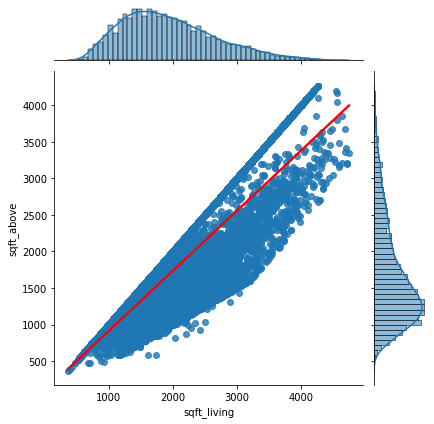

In [42]:
value=df_clean_remain['sqft_living'].corr(df_clean_remain['sqft_above'])
print(f'Pearson Coefficent sqft_above VS sqft_living:{value:.2f}','\n')
sns.jointplot(x='sqft_living', y='sqft_above', data=df_clean_remain, kind='reg',joint_kws={'line_kws':{'color':'red'}});

Pearson Coefficent sqft_lot VS sqft_lot15:0.82 



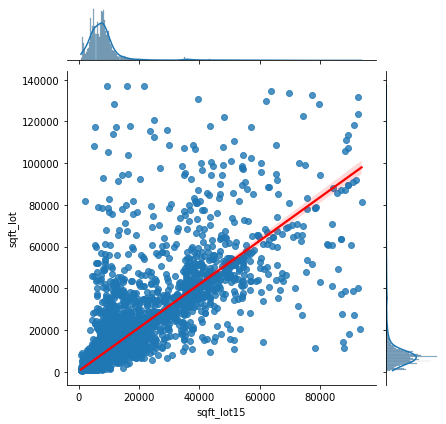

In [43]:
value=df_clean_remain['sqft_lot15'].corr(df_clean_remain['sqft_lot'])
print(f'Pearson Coefficent sqft_lot VS sqft_lot15:{value:.2f}','\n')
sns.jointplot(x='sqft_lot15', y='sqft_lot', data=df_clean_remain, kind='reg',joint_kws={'line_kws':{'color':'red'}});

### Delet the variables _sqft_lot15_ and _sqft_above_ according to value of correlation _Pearson_ value obtained, with variables _sqft_lot_ and _sqft_living_ resplectly

In [44]:
df_clean_remain=df_clean_remain.drop(['sqft_lot15','sqft_above'],axis=1)

In [45]:
df_clean_remain.shape

(18701, 18)

In [46]:
df_clean_remain

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,year,month,day
0,3,1.00,1180,5650.0,1.0,0,0,3,7,0,1955,0,47.5112,-122.257,1340,2014,10,13
2,2,1.00,770,10000.0,1.0,0,0,3,6,0,1933,0,47.7379,-122.233,2720,2015,2,25
3,4,3.00,1960,5000.0,1.0,0,0,5,7,910,1965,0,47.5208,-122.393,1360,2014,12,9
4,3,2.00,1680,8080.0,1.0,0,0,3,8,0,1987,0,47.6168,-122.045,1800,2015,2,18
6,3,2.25,1715,6819.0,2.0,0,0,3,7,0,1995,0,47.3097,-122.327,2238,2014,6,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21610,3,2.50,1530,1131.0,3.0,0,0,3,8,0,2009,0,47.6993,-122.346,1530,2014,5,21
21611,4,2.50,2310,5813.0,2.0,0,0,3,8,0,2014,0,47.5107,-122.362,1830,2015,2,23
21612,2,0.75,1020,1350.0,2.0,0,0,3,7,0,2009,0,47.5944,-122.299,1020,2014,6,23
21613,3,2.50,1600,2388.0,2.0,0,0,3,8,0,2004,0,47.5345,-122.069,1410,2015,1,16


###Value counts of _bedrooms_

In [47]:
df_clean_remain['bedrooms'].unique()

array([3, 2, 4, 5, 1, 6])

In [48]:
df_clean_remain['bedrooms'].value_counts()

3    8801
4    5862
2    2492
5    1225
6     173
1     148
Name: bedrooms, dtype: int64

In [49]:
df_clean_remain['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5])

In [50]:
df_clean_remain['floors'].value_counts()

1.0    9497
2.0    6931
1.5    1613
3.0     558
2.5     102
Name: floors, dtype: int64

# Implementation Neuronal Network with many models

##Unnormalized data

In [51]:
X_data=df_clean_remain.to_numpy()
y_data=df_clean_price.to_numpy()

In [52]:
X_train, X_test, y_train,y_test = train_test_split(X_data, y_data, test_size=0.2,random_state=1234)

###First Model: four layers (first three layers 50 neurons each one, last layer just one neuron)

In [53]:
def get_model(input_shape):
  model = Sequential([InputLayer(input_shape=input_shape),
                      Dense(units=50,activation='relu'),
                      Dense(units=50,activation='relu'),
                      Dense(units=50,activation='relu'),
                      Dense(units=1,activation='linear')                 
  ])
  return model

In [54]:
def compile_model(model):
  model.compile(optimizer='adam',loss='mse',metrics=['mape'])

In [55]:
model=get_model(X_train[0].shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                950       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,101
Trainable params: 6,101
Non-trainable params: 0
_________________________________________________________________


In [56]:
compile_model(model)
history=model.fit(X_train,y_train,batch_size=64,epochs=50,validation_split=0.15,verbose=0)

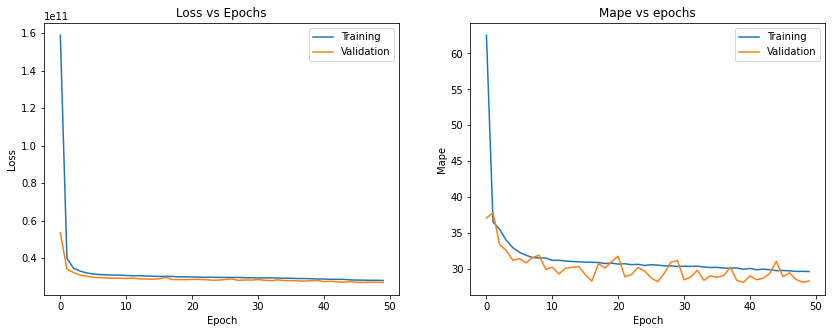

In [57]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Loss vs Epochs')
ax[0].set(xlabel='Epoch',ylabel='Loss')
ax[0].legend(['Training','Validation'], loc='upper right')
ax[1].plot(history.history['mape'])
ax[1].plot(history.history['val_mape'])
ax[1].set_title('Mape vs epochs')
ax[1].set(xlabel='Epoch',ylabel='Mape')
ax[1].legend(['Training','Validation'], loc='upper right')
plt.show()

In [58]:
train_result=dict(zip(model.metrics_names,model.evaluate(X_train, y_train)))
mape_train=train_result['mape']
loss_train=train_result['loss']
print(f'Train_mape:{mape_train:.2f}','\t',f'Train_loss:{loss_train:.2f}','\n')
test_result=dict(zip(model.metrics_names,model.evaluate(X_test, y_test)))
mape_test=test_result['mape']
loss_test=test_result['loss']
print(f'Test_mape:{mape_test:.2f}','\t',f'Test_loss:{loss_test:.2f}')

468/468 [==============================] - 1s 2ms/step - loss: 27744786432.0000 - mape: 28.7860
Train_mape:28.79 	 Train_loss:27744786432.00 

117/117 [==============================] - 0s 2ms/step - loss: 26656288768.0000 - mape: 28.8235
Test_mape:28.82 	 Test_loss:26656288768.00


In [59]:
n=np.random.randint(0,X_test.shape[0],10)
for i in range(10):
  prediction=model.predict(X_test[n[i]:n[i]+1])[0][0]
  real=y_test[n[i]]
  print(f'predicted house price value:{prediction:.0f}','\t',f'real value:{real:.0f}')

predicted house price value:600078 	 real value:905000
predicted house price value:220830 	 real value:202500
predicted house price value:475707 	 real value:748000
predicted house price value:397385 	 real value:385000
predicted house price value:531030 	 real value:294000
predicted house price value:249195 	 real value:242500
predicted house price value:590771 	 real value:1220000
predicted house price value:390262 	 real value:519000
predicted house price value:541516 	 real value:325000
predicted house price value:361190 	 real value:275000


### Second Model: four layers (first three layers 50 neurons each one, last layer just one neuron) and Regularizer _l1_

In [60]:
def get_regularized_model_l1(input_shape,wd):
  model = Sequential([InputLayer(input_shape=input_shape),
                      Dense(units=50,kernel_regularizer=regularizers.l1(wd),activation='relu'),
                      Dense(units=50,kernel_regularizer=regularizers.l1(wd),activation='relu'),
                      Dense(units=50,kernel_regularizer=regularizers.l1(wd),activation='relu'),
                      Dense(units=1,kernel_regularizer=regularizers.l1(wd),activation='linear')                 
  ])
  return model

In [61]:
model_regu_l1=get_regularized_model_l1(X_train[0].shape,1e-3)
model_regu_l1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                950       
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,101
Trainable params: 6,101
Non-trainable params: 0
_________________________________________________________________


In [62]:
compile_model(model_regu_l1)
history=model_regu_l1.fit(X_train,y_train,batch_size=64,epochs=50,validation_split=0.15,verbose=0)

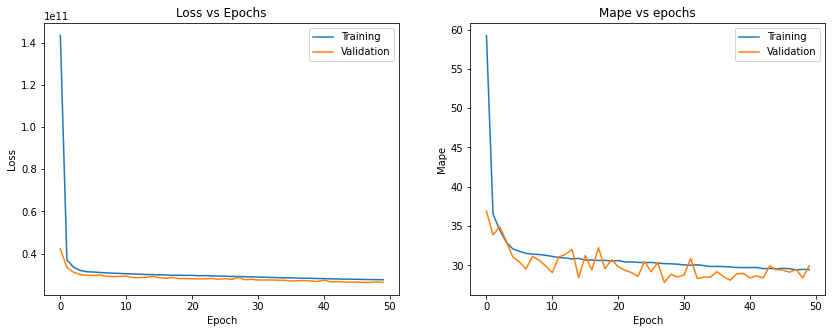

In [63]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Loss vs Epochs')
ax[0].set(xlabel='Epoch',ylabel='Loss')
ax[0].legend(['Training','Validation'], loc='upper right')
ax[1].plot(history.history['mape'])
ax[1].plot(history.history['val_mape'])
ax[1].set_title('Mape vs epochs')
ax[1].set(xlabel='Epoch',ylabel='Mape')
ax[1].legend(['Training','Validation'], loc='upper right')
plt.show()

In [64]:
train_result=dict(zip(model_regu_l1.metrics_names,model_regu_l1.evaluate(X_train, y_train)))
mape_train=train_result['mape']
loss_train=train_result['loss']
print(f'Train_mape:{mape_train:.2f}','\t',f'Train_loss:{loss_train:.2f}','\n')
test_result=dict(zip(model_regu_l1.metrics_names,model_regu_l1.evaluate(X_test, y_test)))
mape_test=test_result['mape']
loss_test=test_result['loss']
print(f'Test_mape:{mape_test:.2f}','\t',f'Test_loss:{loss_test:.2f}')

468/468 [==============================] - 1s 2ms/step - loss: 27402549248.0000 - mape: 30.3296
Train_mape:30.33 	 Train_loss:27402549248.00 

117/117 [==============================] - 0s 2ms/step - loss: 26269192192.0000 - mape: 30.3892
Test_mape:30.39 	 Test_loss:26269192192.00


In [ ]:
model=load_model('my_keras_model.h5')

###Third Model: four layers (first three layers 50 neurons each one, last layer just one neuron) and Regularizer _l2_

In [65]:
def get_regularized_model_l2(input_shape,wd):
  model = Sequential([InputLayer(input_shape=input_shape),
                      Dense(units=50,kernel_regularizer=regularizers.l2(wd),activation='relu'),
                      Dense(units=50,kernel_regularizer=regularizers.l2(wd),activation='relu'),
                      Dense(units=50,kernel_regularizer=regularizers.l2(wd),activation='relu'),
                      Dense(units=1,kernel_regularizer=regularizers.l2(wd),activation='linear')                 
  ])
  return model

In [66]:
model_regu_l2=get_regularized_model_l2(X_train[0].shape,1e-3)
model_regu_l2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                950       
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6,101
Trainable params: 6,101
Non-trainable params: 0
_________________________________________________________________


In [67]:
compile_model(model_regu_l2)
history=model_regu_l2.fit(X_train,y_train,batch_size=64,epochs=50,validation_split=0.15,verbose=0)

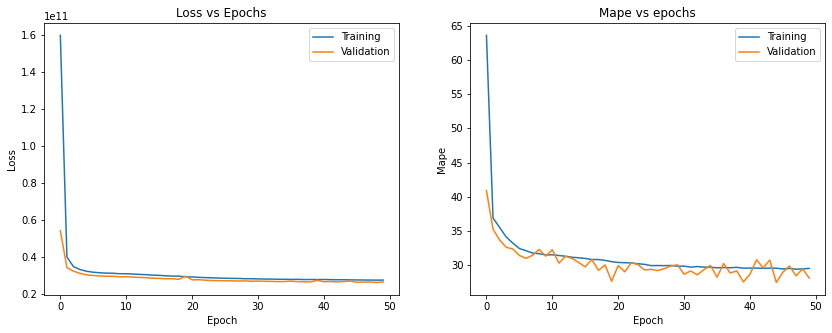

In [68]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Loss vs Epochs')
ax[0].set(xlabel='Epoch',ylabel='Loss')
ax[0].legend(['Training','Validation'], loc='upper right')
ax[1].plot(history.history['mape'])
ax[1].plot(history.history['val_mape'])
ax[1].set_title('Mape vs epochs')
ax[1].set(xlabel='Epoch',ylabel='Mape')
ax[1].legend(['Training','Validation'], loc='upper right')
plt.show()

In [69]:
train_result=dict(zip(model_regu_l2.metrics_names,model_regu_l2.evaluate(X_train, y_train)))
mape_train=train_result['mape']
loss_train=train_result['loss']
print(f'Train_mape:{mape_train:.2f}','\t',f'Train_loss:{loss_train:.2f}','\n')
test_result=dict(zip(model_regu_l2.metrics_names,model_regu_l2.evaluate(X_test, y_test)))
mape_test=test_result['mape']
loss_test=test_result['loss']
print(f'Test_mape:{mape_test:.2f}','\t',f'Test_loss:{loss_test:.2f}')

468/468 [==============================] - 1s 2ms/step - loss: 27231703040.0000 - mape: 28.5562
Train_mape:28.56 	 Train_loss:27231703040.00 

117/117 [==============================] - 0s 2ms/step - loss: 26195279872.0000 - mape: 28.5679
Test_mape:28.57 	 Test_loss:26195279872.00


In [70]:
n=np.random.randint(0,X_test.shape[0],10)
for i in range(10):
  prediction=model_regu_l2.predict(X_test[n[i]:n[i]+1])[0][0]
  real=y_test[n[i]]
  print(f'predicted house price value:{prediction:.0f}','\t',f'real value:{real:.0f}')

predicted house price value:376734 	 real value:440000
predicted house price value:317286 	 real value:249000
predicted house price value:195759 	 real value:291500
predicted house price value:476351 	 real value:755000
predicted house price value:712334 	 real value:410000
predicted house price value:838085 	 real value:635000
predicted house price value:400713 	 real value:450500
predicted house price value:434604 	 real value:499000
predicted house price value:183198 	 real value:169500
predicted house price value:677672 	 real value:940000


###Fourth Model: four layers (first three layers 50 neurons each one, last layer just one neuron) and mixed Regularizers _l1_ and _l2_

In [71]:
def get_regularized_model_l1l2(input_shape,wd):
  model = Sequential([InputLayer(input_shape=input_shape),
                      Dense(units=50,kernel_regularizer=regularizers.L1L2(wd),activation='relu'),
                      Dense(units=50,kernel_regularizer=regularizers.L1L2(wd),activation='relu'),
                      Dense(units=50,kernel_regularizer=regularizers.L1L2(wd),activation='relu'),
                      Dense(units=1,kernel_regularizer=regularizers.L1L2(wd),activation='linear')                 
  ])
  return model

In [72]:
model_regu_l1l2=get_regularized_model_l1l2(X_train[0].shape,1e-3)
model_regu_l1l2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 50)                950       
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 50)                2550      
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 6,101
Trainable params: 6,101
Non-trainable params: 0
_________________________________________________________________


In [73]:
compile_model(model_regu_l1l2)
history=model_regu_l1l2.fit(X_train,y_train,batch_size=64,epochs=50,validation_split=0.15,verbose=0)

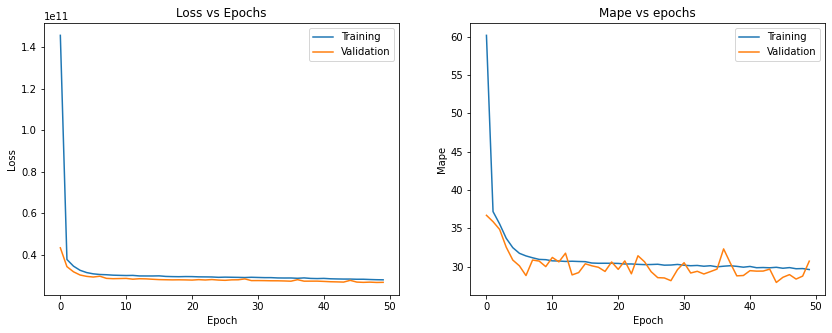

In [74]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Loss vs Epochs')
ax[0].set(xlabel='Epoch',ylabel='Loss')
ax[0].legend(['Training','Validation'], loc='upper right')
ax[1].plot(history.history['mape'])
ax[1].plot(history.history['val_mape'])
ax[1].set_title('Mape vs epochs')
ax[1].set(xlabel='Epoch',ylabel='Mape')
ax[1].legend(['Training','Validation'], loc='upper right')
plt.show()

In [75]:
train_result=dict(zip(model_regu_l1l2.metrics_names,model_regu_l1l2.evaluate(X_train, y_train)))
mape_train=train_result['mape']
loss_train=train_result['loss']
print(f'Train_mape:{mape_train:.2f}','\t',f'Train_loss:{loss_train:.2f}','\n')
test_result=dict(zip(model_regu_l1l2.metrics_names,model_regu_l1l2.evaluate(X_test, y_test)))
mape_test=test_result['mape']
loss_test=test_result['loss']
print(f'Test_mape:{mape_test:.2f}','\t',f'Test_loss:{loss_test:.2f}')

468/468 [==============================] - 1s 3ms/step - loss: 28001175552.0000 - mape: 31.3400
Train_mape:31.34 	 Train_loss:28001175552.00 

117/117 [==============================] - 1s 6ms/step - loss: 27013898240.0000 - mape: 31.5004
Test_mape:31.50 	 Test_loss:27013898240.00


In [76]:
n=np.random.randint(0,X_test.shape[0],10)
for i in range(10):
  prediction=model_regu_l1l2.predict(X_test[n[i]:n[i]+1])[0][0]
  real=y_test[n[i]]
  print(f'predicted house price value:{prediction:.0f}','\t',f'real value:{real:.0f}')

predicted house price value:584343 	 real value:360000
predicted house price value:784254 	 real value:750000
predicted house price value:782829 	 real value:359500
predicted house price value:710645 	 real value:730000
predicted house price value:627952 	 real value:738000
predicted house price value:633712 	 real value:409950
predicted house price value:603186 	 real value:630000
predicted house price value:464265 	 real value:723000
predicted house price value:433316 	 real value:472000
predicted house price value:655777 	 real value:968000


###Fifth Model: four layers (first three layers 50 neurons each one, last layer just one neuron), Regularizer _l1_ and _dropout_

In [77]:
def get_regularized_model_Do(input_shape,wd,rate):
  model = Sequential([InputLayer(input_shape=input_shape),
                      Dense(units=50,kernel_regularizer=regularizers.l1(wd),activation='relu'),Dropout(rate),
                      Dense(units=50,kernel_regularizer=regularizers.l1(wd),activation='relu'),Dropout(rate),
                      Dense(units=50,kernel_regularizer=regularizers.l1(wd),activation='relu'),Dropout(rate),
                      Dense(units=1,kernel_regularizer=regularizers.l1(wd),activation='linear'),Dropout(rate)                 
  ])
  return model

In [78]:
model_regu_do=get_regularized_model_Do(X_train[0].shape,1e-3,0.5)
model_regu_do.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 50)                950       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_17 (Dense)            (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_18 (Dense)            (None, 50)                2550      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [79]:
compile_model(model_regu_do)
history=model_regu_do.fit(X_train,y_train,batch_size=64,epochs=50,validation_split=0.15,verbose=0)

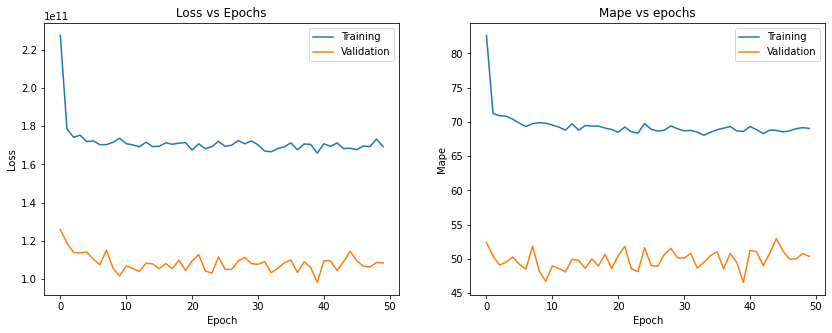

In [80]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Loss vs Epochs')
ax[0].set(xlabel='Epoch',ylabel='Loss')
ax[0].legend(['Training','Validation'], loc='upper right')
ax[1].plot(history.history['mape'])
ax[1].plot(history.history['val_mape'])
ax[1].set_title('Mape vs epochs')
ax[1].set(xlabel='Epoch',ylabel='Mape')
ax[1].legend(['Training','Validation'], loc='upper right')
plt.show()

In [81]:
train_result=dict(zip(model_regu_do.metrics_names,model_regu_do.evaluate(X_train, y_train)))
mape_train=train_result['mape']
loss_train=train_result['loss']
print(f'Train_mape:{mape_train:.2f}','\t',f'Train_loss:{loss_train:.2f}','\n')
test_result=dict(zip(model_regu_do.metrics_names,model_regu_do.evaluate(X_test, y_test)))
mape_test=test_result['mape']
loss_test=test_result['loss']
print(f'Test_mape:{mape_test:.2f}','\t',f'Test_loss:{loss_test:.2f}')

468/468 [==============================] - 1s 3ms/step - loss: 108799983616.0000 - mape: 49.9705
Train_mape:49.97 	 Train_loss:108799983616.00 

117/117 [==============================] - 0s 3ms/step - loss: 105608077312.0000 - mape: 49.5719
Test_mape:49.57 	 Test_loss:105608077312.00


In [82]:
n=np.random.randint(0,X_test.shape[0],10)
for i in range(10):
  prediction=model_regu_do.predict(X_test[n[i]:n[i]+1])[0][0]
  real=y_test[n[i]]
  print(f'predicted house price value:{prediction:.0f}','\t',f'real value:{real:.0f}')

predicted house price value:220464 	 real value:325000
predicted house price value:303241 	 real value:295500
predicted house price value:279703 	 real value:490000
predicted house price value:108220 	 real value:153000
predicted house price value:227589 	 real value:625000
predicted house price value:286028 	 real value:705000
predicted house price value:237658 	 real value:600000
predicted house price value:223697 	 real value:410000
predicted house price value:182305 	 real value:450500
predicted house price value:152290 	 real value:330000


**Observe that the best model obtained respect the metric _mape_ value was the third model with 28.57 (unnormalized model)**

##Normalized data

In [83]:
X_train_norm=preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test_norm=preprocessing.StandardScaler().fit(X_test).transform(X_test)
y_train_norm=np.ndarray.flatten(preprocessing.StandardScaler().fit(np.reshape(y_train,(-1,1))).transform(np.reshape(y_train,(-1,1))))
y_test_norm=np.ndarray.flatten(preprocessing.StandardScaler().fit(np.reshape(y_test,(-1,1))).transform(np.reshape(y_test,(-1,1))))

### First Model: four layers (first three layers 50 neurons each one, last layer just one neuron) and Regularizer _l1_

In [84]:
history=model_regu_l1.fit(X_train_norm,y_train_norm,batch_size=64,epochs=50,validation_split=0.15,verbose=0)

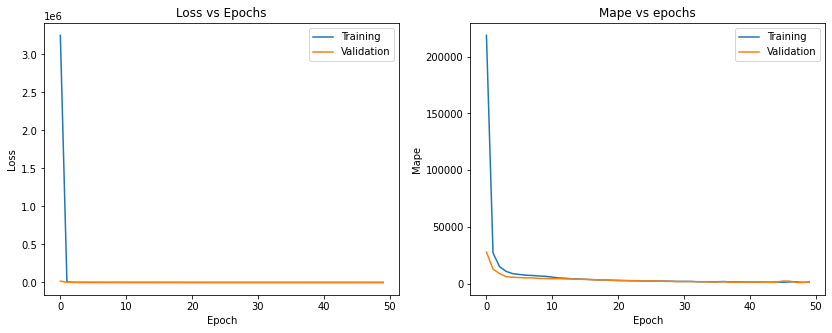

In [85]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Loss vs Epochs')
ax[0].set(xlabel='Epoch',ylabel='Loss')
ax[0].legend(['Training','Validation'], loc='upper right')
ax[1].plot(history.history['mape'])
ax[1].plot(history.history['val_mape'])
ax[1].set_title('Mape vs epochs')
ax[1].set(xlabel='Epoch',ylabel='Mape')
ax[1].legend(['Training','Validation'], loc='upper right')
plt.show()

In [86]:
train_result=dict(zip(model_regu_l1.metrics_names,model_regu_l1.evaluate(X_train_norm, y_train_norm)))
mape_train=train_result['mape']
loss_train=train_result['loss']
print(f'Train_mape:{mape_train:.2f}','\t',f'Train_loss:{loss_train:.2f}','\n')
test_result=dict(zip(model_regu_l1.metrics_names,model_regu_l1.evaluate(X_test_norm, y_test_norm)))
mape_test=test_result['mape']
loss_test=test_result['loss']
print(f'Test_mape:{mape_test:.2f}','\t',f'Test_loss:{loss_test:.2f}')

468/468 [==============================] - 1s 2ms/step - loss: 52.3724 - mape: 1719.8438
Train_mape:1719.84 	 Train_loss:52.37 

117/117 [==============================] - 0s 2ms/step - loss: 49.5701 - mape: 6903.3667
Test_mape:6903.37 	 Test_loss:49.57


In [87]:
n=np.random.randint(0,X_test.shape[0],10)
for i in range(10):
  prediction=model_regu_l1.predict(X_test_norm[n[i]:n[i]+1])[0][0]
  real=y_test_norm[n[i]]
  print(f'predicted house price value:{prediction:.2f}','\t',f'real value:{real:.2f}')

predicted house price value:1.42 	 real value:1.61
predicted house price value:-0.58 	 real value:0.91
predicted house price value:1.05 	 real value:-0.33
predicted house price value:6.26 	 real value:0.49
predicted house price value:4.49 	 real value:0.15
predicted house price value:2.02 	 real value:-0.35
predicted house price value:1.06 	 real value:1.44
predicted house price value:-0.31 	 real value:-1.16
predicted house price value:2.29 	 real value:0.67
predicted house price value:-9.97 	 real value:-0.85


### Second Model: four layers (first three layers 50 neurons each one, last layer just one neuron), Regularizer _l1_ and _exponential dacay of learning rate_

In [88]:
def compile_model_lr(model):
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2,decay_steps=10000,decay_rate=0.9)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),loss='mse',metrics=['mape'])


In [95]:
my_checkpoint=ModelCheckpoint('RafaelB_keras_model.h5',
                           save_weights_only=False,
                           frequency='epoch',
                           verbose=1)

In [96]:
compile_model_lr(model_regu_l1)
history=model_regu_l1.fit(X_train_norm,y_train_norm,batch_size=64,epochs=50,validation_split=0.15,verbose=0,callbacks=[my_checkpoint])


Epoch 1: saving model to RafaelB_keras_model.h5

Epoch 2: saving model to RafaelB_keras_model.h5

Epoch 3: saving model to RafaelB_keras_model.h5

Epoch 4: saving model to RafaelB_keras_model.h5

Epoch 5: saving model to RafaelB_keras_model.h5

Epoch 6: saving model to RafaelB_keras_model.h5

Epoch 7: saving model to RafaelB_keras_model.h5

Epoch 8: saving model to RafaelB_keras_model.h5

Epoch 9: saving model to RafaelB_keras_model.h5

Epoch 10: saving model to RafaelB_keras_model.h5

Epoch 11: saving model to RafaelB_keras_model.h5

Epoch 12: saving model to RafaelB_keras_model.h5

Epoch 13: saving model to RafaelB_keras_model.h5

Epoch 14: saving model to RafaelB_keras_model.h5

Epoch 15: saving model to RafaelB_keras_model.h5

Epoch 16: saving model to RafaelB_keras_model.h5

Epoch 17: saving model to RafaelB_keras_model.h5

Epoch 18: saving model to RafaelB_keras_model.h5

Epoch 19: saving model to RafaelB_keras_model.h5

Epoch 20: saving model to RafaelB_keras_model.h5

Epoch 21

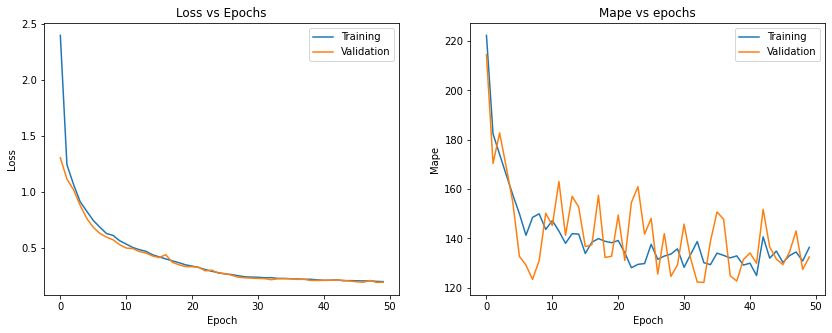

In [97]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set_title('Loss vs Epochs')
ax[0].set(xlabel='Epoch',ylabel='Loss')
ax[0].legend(['Training','Validation'], loc='upper right')
ax[1].plot(history.history['mape'])
ax[1].plot(history.history['val_mape'])
ax[1].set_title('Mape vs epochs')
ax[1].set(xlabel='Epoch',ylabel='Mape')
ax[1].legend(['Training','Validation'], loc='upper right')
plt.show()

In [98]:
train_result=dict(zip(model_regu_l1.metrics_names,model_regu_l1.evaluate(X_train_norm, y_train_norm)))
mape_train=train_result['mape']
loss_train=train_result['loss']
print(f'Train_mape:{mape_train:.2f}','\t',f'Train_loss:{loss_train:.2f}','\n')
test_result=dict(zip(model_regu_l1.metrics_names,model_regu_l1.evaluate(X_test_norm, y_test_norm)))
mape_test=test_result['mape']
loss_test=test_result['loss']
print(f'Test_mape:{mape_test:.2f}','\t',f'Test_loss:{loss_test:.2f}')

468/468 [==============================] - 1s 1ms/step - loss: 0.1917 - mape: 125.2256
Train_mape:125.23 	 Train_loss:0.19 

117/117 [==============================] - 0s 2ms/step - loss: 0.1924 - mape: 359.7697
Test_mape:359.77 	 Test_loss:0.19


In [99]:
n=np.random.randint(0,X_test.shape[0],10)
for i in range(10):
  prediction=model_regu_l1.predict(X_test_norm[n[i]:n[i]+1])[0][0]
  real=y_test_norm[n[i]]
  print(f'predicted house price value:{prediction:.2f}','\t',f'real value:{real:.2f}')

predicted house price value:-0.17 	 real value:0.06
predicted house price value:1.43 	 real value:1.83
predicted house price value:-0.40 	 real value:-0.16
predicted house price value:-0.10 	 real value:0.32
predicted house price value:-0.88 	 real value:-0.96
predicted house price value:-1.09 	 real value:-0.97
predicted house price value:0.41 	 real value:0.20
predicted house price value:-0.15 	 real value:-0.42
predicted house price value:-0.99 	 real value:-1.00
predicted house price value:-1.25 	 real value:-1.67


**Observe that the best model obtained respect the loss function _mse_ value was the second model with 0.19 (normalized model)**

**The most important difference between the unnormalized and normalized model, is the reduction on _mape_ and the increasing on _mse_ in the first model, and the increasing on _mape_ and the reduction on _mse_ in second model**

###Load Model

In [105]:
model_RB=load_model('RafaelB_keras_model.h5')
scores=model_RB.evaluate(X_test_norm,y_test_norm)
print(scores)

117/117 [==============================] - 1s 2ms/step - loss: 0.1924 - mape: 359.7697
[0.19238950312137604, 359.7696533203125]
